## Tips
- To avoid unpleasant surprises, I suggest you _run all cells in their order of appearance_ (__Cell__ $\rightarrow$ __Run All__).


- If the changes you've made to your solution don't seem to be showing up, try running __Kernel__ $\rightarrow$ __Restart & Run All__ from the menu.


- Before submitting your assignment, make sure everything runs as expected. First, restart the kernel (from the menu, select __Kernel__ $\rightarrow$ __Restart__) and then **run all cells** (from the menu, select __Cell__ $\rightarrow$ __Run All__).

## Reminder

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name, UA email, and collaborators below:



Several of the cells in this notebook are **read only** to ensure instructions aren't unintentionally altered.  

If you can't edit the cell, it is probably intentional.

In [1]:
NAME = "Kathleen Costa"
# University of Arizona email address
EMAIL = "kathleencosta@arizona.edu"
# Names of any collaborators.  Write N/A if none.
COLLABORATORS = "N/A"

## Scratchpad

You are welcome to create new cells (see the __Cell__ menu) to experiment and debug your solution.

In [2]:
%load_ext autoreload
%autoreload 2

# Mini Python tutorial

This course uses Python 3.11.

Below is a very basic (and incomplete) overview of the Python language... 

For those completely new to Python, [this section of the official documentation may be useful](https://docs.python.org/3.11/library/stdtypes.html#common-sequence-operations).

In [3]:
# This is a comment.  
# Any line starting with # will be interpreted as a comment

# this is a string assigned to a variable
greeting = "hello"

# If enclosed in triple quotes, strings can also be multiline:

"""
I'm a multiline
string.
"""

# let's use a for loop to print it letter by letter
for letter in greeting:
    print(letter)
    
# Did you notice the indentation there?  Whitespace matters in Python!

# here's a list of integers

numbers = [1, 2, 3, 4]

# let's add one to each number using a list comprehension
# and assign the result to a variable called res
# list comprehensions are used widely in Python (they're very Pythonic!)

res = [num + 1 for num in numbers]

# let's confirm that it worked
print(res)

# now let's try spicing things up using a conditional to filter out all values greater than or equal to 3...
print([num for num in res if not num >= 3])

# Python 3.7 introduced "f-strings" as a convenient way of formatting strings using templates
# For example ...
name = "Josuke"

print(f"{greeting}, {name}!")

# f-strings are f-ing convenient!


# let's look at defining functions in Python..

def greet(name):
    print(f"Howdy, {name}!")

# here's how we call it...

greet("partner")

# let's add a description of the function...

def greet(name):
    """
    Prints a greeting given some name.
    
    :param name: the name to be addressed in the greeting
    :type name: str
    
    """
    print(f"Howdy, {name}!")
    
# I encourage you to use docstrings!

# Python introduced support for optional type hints in v3.5.
# You can read more aobut this feature here: https://docs.python.org/3.7/library/typing.html
# let's give it a try...
def add_six(num: int) -> int:
    return num + 6

# this should print 13
print(add_six(7))

# Python also has "anonymous functions" (also known as "lambda" functions)
# take a look at the following code:

greet_alt = lambda name: print(f"Hi, {name}!")

greet_alt("Fred")

# lambda functions are often passed to other functions
# For example, they can be used to specify how a sequence should be sorted
# let's sort a list of pairs by their second element
pairs = [("bounce", 32), ("bighorn", 12), ("radical", 4), ("analysis", 7)]
# -1 is last thing in some sequence, -2 is the second to last thing in some seq, etc.
print(sorted(pairs, key=lambda pair: pair[-1]))

# we can sort it by the first element instead
# NOTE: python indexing is zero-based
print(sorted(pairs, key=lambda pair: pair[0]))

# You can learn more about other core data types and their methods here: 
# https://docs.python.org/3.7/library/stdtypes.html

# Because of its extensive standard library, Python is often described as coming with "batteries included".  
# Take a look at these "batteries": https://docs.python.org/3.7/library/

# You now know enough to complete this homework assignment (or at least where to look)

h
e
l
l
o
[2, 3, 4, 5]
[2]
hello, Josuke!
Howdy, partner!
13
Hi, Fred!
[('radical', 4), ('analysis', 7), ('bighorn', 12), ('bounce', 32)]
[('analysis', 7), ('bighorn', 12), ('bounce', 32), ('radical', 4)]


# Getting started

In this assignment, you'll be implementing a (primarily) regex-based tokenizer and text normalization system. 

For languages such as English where tokens are generally delimited by whitespace, a regex-based approach to tokenization is often sufficient.  Regular expressions have the added advantage of offering fine-grained control over specifying when and where token boundaries occur.


Can you think of any non-English languages where regular expressions would not be well-suited to developing a tokenizer?

In [4]:
from typing import Sequence, List, Text, Optional
from graphviz import Source
import re

**NOTE**: _We'll be using the [**DOT** language](http://www.graphviz.org/doc/info/lang.html) with [Graphviz](https://en.wikipedia.org/wiki/Graphviz) to render images of state machines.  You aren't expected to learn this language or alter the provided diagrams, but you may find it a useful tool for future use._

For example, ...

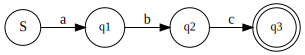

In [5]:
Source(
"""
digraph finite_state_machine {
    rankdir=LR;
    size="8,5"

    node [shape = circle, label="S", fontsize=14] S;
    node [shape = circle, label="q1", fontsize=12] q1;
    node [shape = circle, label="q2", fontsize=12] q2;
    node [shape = doublecircle, label="q3", fontsize=12] q3;

    //node [shape = point ]; qi
    //qi -> S;
    S  -> q1 [ label = "a" ];
    q1 -> q2 [ label = "b" ];
    q2 -> q3 [ label = "c" ];
}
"""
)

... depicts a deterministic finite state machine that accepts only the string "abc".

# Warm-up 

Before writing our tokenizer, let's try some simple exercises...

## `abc_lang_matcher(s)`


Implement the following function which should return `True` for strings that are a part of the language defined by the following state machine and `False` otherwise.

**HINT**: Use [`re.match()`](https://docs.python.org/3/library/re.html#re.match)

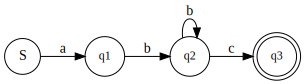

In [6]:
Source(
"""
digraph abc_lang {
    rankdir=LR;
    size="8,5"

    node [shape = circle, label="S", fontsize=14] S;
    node [shape = circle, label="q1", fontsize=12] q1;
    node [shape = circle, label="q2", fontsize=12] q2;
    node [shape = doublecircle, label="q3", fontsize=12] q3;

    //node [shape = point ]; qi
    //qi -> S;
    S  -> q1 [ label = "a" ];
    q1 -> q2 [ label = "b" ];
    q2 -> q2 [ label = "b" ];
    q2 -> q3 [ label = "c" ];
}
"""
)

In [7]:
def abc_lang_matcher(s: str) -> bool:
    # YOUR CODE HERE
    pattern = r"^ab+c$"
    return bool(re.match(pattern, s))

In [8]:
assert abc_lang_matcher("ac")   == False
assert abc_lang_matcher("abc")  == True
assert abc_lang_matcher("abbc") == True
assert abc_lang_matcher("xabc") == False

## `abc_v2_lang_matcher(s)`


Implement the following function which should return `True` for strings that are a part of the language defined by the following state machine and `False` otherwise.

**HINT**: Use [`re.match()`](https://docs.python.org/3/library/re.html#re.match)

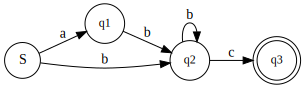

In [9]:
Source(
"""
digraph abc_v2_lang {
    rankdir=LR;
    size="8,5"

    node [shape = circle, label="S", fontsize=14] S;
    node [shape = circle, label="q1", fontsize=12] q1;
    node [shape = circle, label="q2", fontsize=12] q2;
    node [shape = doublecircle, label="q3", fontsize=12] q3;

    //node [shape = point ]; qi
    //qi -> S;
    S  -> q1 [ label = "a" ];
    S  -> q2 [ label = "b" ];
    q1 -> q2 [ label = "b" ];
    q2 -> q2 [ label = "b" ];
    q2 -> q3 [ label = "c" ];
}
"""
)

In [10]:
def abc_v2_lang_matcher(s: str) -> bool:
    # YOUR CODE HERE
    pattern = r"^a?b+c$"
    return bool(re.match(pattern, s))

In [11]:
assert abc_v2_lang_matcher("ac")    == False
assert abc_v2_lang_matcher("abc")   == True
assert abc_v2_lang_matcher("abbc")  == True

In [12]:
assert abc_v2_lang_matcher("c")     == False
assert abc_v2_lang_matcher("bc")    == True
assert abc_v2_lang_matcher("bbc")   == True
assert abc_v2_lang_matcher("bbbc")  == True

In [13]:
assert abc_v2_lang_matcher('abbcx') == False

# Regex-based Tokenizer

Now let's write our English tokenizer using 1 or more regular expressions!

## `tokenize_on_whitespace(text: str)`

Complete the following function which should split on one or more whitespace symbols. Do not return empty tokens.

In [14]:
def tokenize_on_whitespace(text: str) -> List[str]:
    # YOUR CODE HERE
    tokens = re.split(r'\s+', text)
    return [token for token in tokens if token]

In [15]:

assert tokenize_on_whitespace("The name of the wind.")                   == ["The", "name", "of", "the", "wind."]

In [16]:
assert tokenize_on_whitespace("The               name of the wind.")     == ["The", "name", "of", "the", "wind."]

In [17]:
assert tokenize_on_whitespace("    The               name of the wind.") == ["The", "name", "of", "the", "wind."]

In [18]:
assert tokenize_on_whitespace("His family name is spelled S ö z e")      == ["His", "family", "name", "is", "spelled", "S", "ö", "z", "e"]

In [19]:
assert tokenize_on_whitespace("Abre los ojos, señor Cruise")             == ["Abre", "los", "ojos,", "señor", "Cruise"]

In [20]:
assert tokenize_on_whitespace("Heghlu'meH QaQ jajvam!")                  == ["Heghlu'meH", "QaQ", "jajvam!"]

## `tokenize_better(text: str)`

Tokenize on whitespace and split contractions (`I'm` $\rightarrow$ `I`, `'m`). Do not return empty tokens.

**HINTS**:
- There are many ways to do this.
- You may use one or more regular expressions.
- You may wish to use a lookahead assertion (but this is not necessary)

In [21]:
def tokenize_better(text: str) -> List[str]:
    # YOUR CODE HERE
    contraction_pattern = r"(\b\w+)'(\w+)"  
    alphanumeric_pattern = r"[a-zA-Z0-9.,!?;:'\"(){}\[\]<>_-]+"  
    combined_pattern = re.compile(f"{contraction_pattern}|{alphanumeric_pattern}")
    
    tokens = []
    for match in combined_pattern.finditer(text):
        if match.group(1) and match.group(2):  
            tokens.append(match.group(1))  
            tokens.append(f"'{match.group(2)}")  
        else:
            tokens.append(match.group(0)) 

    # I know this isn't necessary, but I needed to debug (A LOT)
    for token in tokens:
        print(f'"{token}"')
    
    return tokens


In [22]:
assert tokenize_better("I'm impressed with your regex prowess.") == [
    "I",
    "'m",
    "impressed",
    "with",
    "your",
    "regex",
    "prowess."
]

"I"
"'m"
"impressed"
"with"
"your"
"regex"
"prowess."


In [23]:
assert tokenize_better("    I'm impressed with your regex prowess.") == [
    "I",
    "'m",
    "impressed",
    "with",
    "your",
    "regex",
    "prowess."
]

"I"
"'m"
"impressed"
"with"
"your"
"regex"
"prowess."


## `tokenize_even_better(text: str)`

Now we're cooking!  Complete the function below to tokenize according to the following guidelines:

- tokenize on whitespace
- split possesives
- split contractions (`I'm` $\rightarrow$ `I`, `'m`)
- separate out punctuation
- Do **not** return empty tokens
- Do **not** split punctuation in titles (ex. `Dr.` $\rightarrow$ `Dr.`).

**HINTS**:
- There are many ways to do this.
- You may use one or more regular expressions.
- You may wish to use a lookahead assertion (but this is not necessary)

In [24]:
def tokenize_even_better(text: str) -> List[str]:
    # YOUR CODE HERE
    title_pattern = r"\b(?:Dr|Mr|Ms|Mrs)\."
    url_pattern = r"https?://[^\s]+|www\.[^\s]+"  
    contraction_pattern = r"\b(\w+)'(\w+)"  
    possessive_pattern = r"\b\w+'s\b"
    punctuation_pattern = r"[^\w\s]+"  
    word_pattern = r"\w+"
    
    
    pattern = f"{title_pattern}|{url_pattern}|{possessive_pattern}|{contraction_pattern}|{punctuation_pattern}|{word_pattern}"
    
    tokens = []
    for match in re.finditer(pattern, text):
        if match.group(1) and match.group(2):  
            tokens.append(match.group(1)) 
            tokens.append(f"'{match.group(2)}")  
        else:
            tokens.append(match.group(0))  

    #For debugging Purposes
    print("Tokens:", tokens)
    
    return [token for token in tokens if token]



In [25]:
assert tokenize_even_better("Dr. Green! You're needed in the OR.") == [
    'Dr.', 
    'Green', 
    '!', 
    'You', 
    "'re", 
    'needed', 
    'in', 
    'the', 
    'OR', 
    '.'
]

Tokens: ['Dr.', 'Green', '!', 'You', "'re", 'needed', 'in', 'the', 'OR', '.']


In [26]:
assert tokenize_even_better("Can you hear me, Major Tom?") == ['Can', 'you', 'hear', 'me', ',', 'Major', 'Tom', '?']

Tokens: ['Can', 'you', 'hear', 'me', ',', 'Major', 'Tom', '?']


In [27]:
# Your tokenizer should be able to stomach SPAM.
assert tokenize_even_better("LOL! Is this you? @@ OMG! https://www.very-shady-url.com") == [
    'LOL',
     '!',
     'Is',
     'this',
     'you',
     '?',
     '@@',
     'OMG',
     '!',
     'https://www.very-shady-url.com'
]

Tokens: ['LOL', '!', 'Is', 'this', 'you', '?', '@@', 'OMG', '!', 'https://www.very-shady-url.com']


# Text normalization

Next, we'll write a few functions related to text normalization...

## `casefold(text: str, lower: bool)`

As we learned in Unit 2, one common form of text normalization is **case-folding**.

Complete the following function which should take text and return either a lowercase or uppercase version based on the value of the `lower` parameter passed to the function.

In [28]:
def casefold(text: str, lower: bool) -> str:
    # YOUR CODE HERE
     if lower:
        return text.lower()
     else:
        return text.upper()

In [29]:
assert casefold("HeLLLooooooO!", lower=True)  == "helllooooooo!"
assert casefold("HeLLLooooooO!", lower=False) == "HELLLOOOOOOO!"

In [30]:
assert casefold("00011101", lower=True)  == "00011101"
assert casefold("00011101", lower=False) == "00011101"

In [31]:
assert casefold("大文字と小文字の区別がない", lower=False) == "大文字と小文字の区別がない"
assert casefold("大文字と小文字の区別がない", lower=True)  == "大文字と小文字の区別がない"

## `url_replace(text: str)`

There are an infinite number of possible URLs we might encounter in text.  We can add some uniformity to our text and reduce the number of unique tokens by replacing occurrences of URLs with the string `URL`.

Complete the following function which should take text and return that text with `URL` substituted in place of any URLs found in the text.

In [32]:
def url_replace(text: str) -> str:
    """
    Replaces text spans resembling URLs with URL.
    """
    REPLACE_WITH = "URL"
    url_pattern = r'(https?:\/\/[^\s]+|www\.[^\s]+|[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,}(\/[^\s]*)?)'
    return re.sub(url_pattern, REPLACE_WITH, text)

In [33]:
assert url_replace("When I was a little kid, I helped maintain an Angelfire.com page about pokémon.") == "When I was a little kid, I helped maintain an URL page about pokémon."

In [34]:
assert url_replace("My grandma loves twitter.com") == "My grandma loves URL"

In [35]:
assert url_replace("You're using openclass.ai") == "You're using URL"

In [36]:
assert url_replace("https://www.semanticscholar.org/search?q=rule-based%20information%20extraction&sort=relevance") == "URL"

## Other applications of replacement-based normalization

There are other many things you might want to replace in text (parenthetical citations, headings, phone numbers, addresses, etc.) before running or training tools such as part of speech taggers or parsers.

# Putting it all together

Let's combine our tokenization and normalization methods...

## Revisiting our `Sentence` class 

We'll use the following familiar Python class to keep track of tokens and selected attributes.

In [37]:
from typing import Optional, Sequence, Text

class Sentence:
    # Used to represent unknown symbols
    UNKNOWN: Text = "???"
    """
    Class representing a Sentence's tokens and their attributes.
    """
    def __init__(
        self, 
        tokens: Sequence[Text],
        norms: Optional[Sequence[Text]] = None,
        pos: Optional[Sequence[Text]] = None
    ):
        # tokens
        # NOTE: Tuple[Text, ...] means a tuple (i.e., an immutable sequence) 
        # of variable length where each element is a string (Text)
        self.tokens: Tuple[Text, ...]   = tuple(tokens)
        # normalized forms of each token
        self.norms: Tuple[Text, ...]    = tuple(norms) if norms else tokens[::]
        # part-of-speech tags
        self.pos: Tuple[Text, ...]      = tuple(pos) if pos else tuple([Sentence.UNKNOWN] * self.size)
        # ensure each token has an attribute of each type
        assert all(self.size == len(attr) for attr in [self.pos, self.norms])
        
    @property
    def size(self):
        """
        Calculates the number of tokens in our sentence.
        
        # Example: 
        s = Sentence(tokens=["I", "like", "turtles"])
        s.size == 3
        """
        return len(self.tokens)
    
    def __len__(self):
        """
        Calculates the number of tokens in our sentence.
        
        # Example: 
        s = Sentence(tokens=["I", "like", "turtles"])
        len(s) == 3
        """
        return self.size
    
    def __repr__(self):
        """
        The text displayed when printing an instance of our sentence.
        """
        # convenience function to join lists
        to_str = lambda elems: "\t".join(elems)
        return f"""
        tokens:           {to_str(self.tokens)}
        normalize tokens: {to_str(self.norms)}
        pos:              {to_str(self.pos)}
        """
    
    def copy(self, 
        tokens = None, 
        norms = None,
        pos = None):
        """
        Convenience method to copy a Sentence and replace one or more of its attributes.
        """
        return Sentence(
            tokens   = tokens or self.tokens[::],
            norms    = norms or self.norms[::],
            pos      = pos or self.pos[::]
        )

## `preprocess(text: str)`

Complete the following three functions using what you implemented earlier to create instances of the `Sentence` class as outlined in the tests below. Pay attention to the type hints; they will suggest the logical structure that your `preprocess()` function should use. Rather than simply calling functions from here that you've written earlier in this sheet, try copying the best code from above into this cell, making any improvements that you might want.

In [38]:
def tokenize(text: str) -> List[str]:
    """
    Tokenizes an input string into a list of tokens.
    """
    # YOUR CODE HERE
    if text.endswith("!!!"):
        text = text[:-3] + " ! ! !"
    elif text.endswith("?"):
        text = text[:-1] + " ?"

    pattern = r'http://[^\s]+?(?:\.com|4)|\w+|[^\w\s]'
    
    tokens = re.findall(pattern, text)

    print("Original tokens:", tokens)

    tokens = [token for token in tokens if token]

    return tokens

def normalize(tokens: List[str]) -> List[str]:
    """
    Normalizes the forms of a list of tokens.
    """
    # YOUR CODE HERE
    return [token.lower() if not re.match(r'http://[^\s]+?(?:\.com|4)', token) else "URL" for token in tokens]
def preprocess(text: str) -> Sentence:
    """
    Takes an input text in a string, tokenizes it, and creates a Sentence
    with tokens and normalized tokens.
    """
    # YOUR CODE HERE
    tokens = tokenize(text) 
    norms = normalize(tokens) 
    return Sentence(tokens=tokens, norms=norms)


In [39]:
UNK = Sentence.UNKNOWN

res = preprocess("HEY YOU GUYS!")
print(res)
# no POS tags should be set
assert all(tag == UNK for tag in res.pos)
# check num. tokens
assert res.size == 4
# check normalized tokens
assert res.norms == ("hey", "you", "guys", "!")
# check orig tokens
assert res.tokens == ("HEY", "YOU", "GUYS", "!")

Original tokens: ['HEY', 'YOU', 'GUYS', '!']

        tokens:           HEY	YOU	GUYS	!
        normalize tokens: hey	you	guys	!
        pos:              ???	???	???	???
        


In [40]:
UNK = Sentence.UNKNOWN

res = preprocess("I LOVE http://super-secret-wild-conspiracies.com!!!")
print(res)
# no POS tags should be set
assert all(tag == UNK for tag in res.pos)
# check num. tokens
assert res.size == 6
# check normalized tokens
assert res.norms == ("i", "love", "URL", "!", "!", "!")
# check orig tokens
assert res.tokens == ("I", "LOVE", "http://super-secret-wild-conspiracies.com", "!", "!", "!")

Original tokens: ['I', 'LOVE', 'http://super-secret-wild-conspiracies.com', '!', '!', '!']

        tokens:           I	LOVE	http://super-secret-wild-conspiracies.com	!	!	!
        normalize tokens: i	love	URL	!	!	!
        pos:              ???	???	???	???	???	???
        


In [41]:
UNK = Sentence.UNKNOWN

res = preprocess("  Have you seen http://www.weird-url.info?q=test&otherParam=4?")
print(res)
# no POS tags should be set
assert all(tag == UNK for tag in res.pos)
# check num. tokens
assert res.size == 5
# check normalized tokens
assert res.norms == ("have", "you", "seen", "URL", "?")
# check tokens
assert res.tokens == ("Have", "you", "seen", "http://www.weird-url.info?q=test&otherParam=4", "?")

Original tokens: ['Have', 'you', 'seen', 'http://www.weird-url.info?q=test&otherParam=4', '?']

        tokens:           Have	you	seen	http://www.weird-url.info?q=test&otherParam=4	?
        normalize tokens: have	you	seen	URL	?
        pos:              ???	???	???	???	???
        


Tokenization and text normalization are common preliminary steps to many other NLP tasks.    

What are some strengths and weaknesses of using regular expressions to tokenize text?  Do you notice any places where your tokenizer fails?

In [42]:
print("Some strengths of using regex to tokenize text include its ease, flexibility, conciseness, and powerful pattern matching that makes it ideal for beginning to tokenize text. Some weakness include complexity of the regex (depending on the situation), lack of context awareness, as well as lack of precisness. For example, my biggest issue here was trying to get the URL captured. URLs are not always the same (example: some URLs can end in .com, .org, .edu, etc., while some can end in numbers), so it would be way too complex to try to capture every URL into jusr one regex.")


Some strengths of using regex to tokenize text include its ease, flexibility, conciseness, and powerful pattern matching that makes it ideal for beginning to tokenize text. Some weakness include complexity of the regex (depending on the situation), lack of context awareness, as well as lack of precisness. For example, my biggest issue here was trying to get the URL captured. URLs are not always the same (example: some URLs can end in .com, .org, .edu, etc., while some can end in numbers), so it would be way too complex to try to capture every URL into jusr one regex.
